In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           802956 non-null  int64  
 1   Date Rptd       802956 non-null  object 
 2   DATE OCC        802956 non-null  object 
 3   TIME OCC        802956 non-null  int64  
 4   AREA            802956 non-null  int64  
 5   AREA NAME       802956 non-null  object 
 6   Rpt Dist No     802956 non-null  int64  
 7   Part 1-2        802956 non-null  int64  
 8   Crm Cd          802956 non-null  int64  
 9   Crm Cd Desc     802956 non-null  object 
 10  Mocodes         692304 non-null  object 
 11  Vict Age        802956 non-null  int64  
 12  Vict Sex        697683 non-null  object 
 13  Vict Descent    697675 non-null  object 
 14  Premis Cd       802947 non-null  float64
 15  Premis Desc     802481 non-null  object 
 16  Weapon Used Cd  279525 non-null  float64
 17  Weapon Des

In [221]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [222]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [223]:
df = df[[ 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'LAT', 'LON']]

In [224]:
df['Crm Cd Desc'].value_counts().head(20)

Crm Cd Desc
VEHICLE - STOLEN                                            85807
BATTERY - SIMPLE ASSAULT                                    63848
THEFT OF IDENTITY                                           51144
BURGLARY FROM VEHICLE                                       49330
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     49055
BURGLARY                                                    48859
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              46158
THEFT PLAIN - PETTY ($950 & UNDER)                          40887
INTIMATE PARTNER - SIMPLE ASSAULT                           40478
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             31052
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         29336
ROBBERY                                                     27527
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    26005
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    21610
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    1848

In [225]:
violent = ["BATTERY - SIMPLE ASSAULT", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",
  "ROBBERY", "INTIMATE PARTNER - AGGRAVATED ASSAULT", "INTIMATE PARTNER - SIMPLE ASSAULT",
  "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER", "OTHER ASSAULT", "ATTEMPTED ROBBERY",
  "KIDNAPPING - GRAND ATTEMPT", "KIDNAPPING", "CHILD STEALING",
  "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)", "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
  "RESISTING ARREST", "DISCHARGE FIREARMS/SHOTS FIRED", "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT",
  "CRUELTY TO ANIMALS", "LYNCHING - ATTEMPTED", "LYNCHING", "MANSLAUGHTER, NEGLIGENT", "HOMICIDE",
  "FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)", "BLOCKING DOOR INDUCTION CENTER", "INCITING A RIOT",
  "BATTERY ON A FIREFIGHTER", "BATTERY POLICE (SIMPLE)", "CRIMINAL HOMICIDE", "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE",
  "RECKLESS DRIVING", "SHOTS FIRED AT INHABITED DWELLING", "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT", 
  "THROWING OBJECT AT MOVING VEHICLE", "WEAPONS POSSESSION/BOMBING", "BOMB SCARE"]

property = ["VANDALISM - MISDEMEANOR ($399 OR UNDER)", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
  "BURGLARY FROM VEHICLE", "ARSON", "BURGLARY", "BURGLARY, ATTEMPTED", "FAILURE TO YIELD",
  "BURGLARY FROM VEHICLE, ATTEMPTED", "TILL TAP - PETTY ($950 & UNDER)", "TILL TAP - GRAND THEFT ($950.01 & OVER)",
  "PETTY THEFT - AUTO REPAIR", "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)", "THEFT, COIN MACHINE - ATTEMPT",
  "THEFT, COIN MACHINE - PETTY ($950 & UNDER)", "GRAND THEFT / AUTO REPAIR", "DRUNK ROLL",
  "SHOPLIFTING - PETTY THEFT ($950 & UNDER)", "THEFT-GRAND ($950.01 & OVER) EXCEPT GUNS, FOWL, LIVESTOCK, PRODUCE",
  "THEFT PLAIN - PETTY ($950 & UNDER)", "THEFT OF IDENTITY",
  "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER", "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01",
  "COUNTERFEIT", "REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)",
  "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)", "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
  "THEFT FROM MOTOR VEHICLE - ATTEMPT", "SHOPLIFTING - ATTEMPT", "THEFT FROM PERSON - ATTEMPT", "THEFT PLAIN - ATTEMPT",
  "PICKPOCKET", "VEHICLE - ATTEMPT STOLEN", "PICKPOCKET, ATTEMPT", "BIKE - ATTEMPTED STOLEN",
  "VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)", "TELEPHONE PROPERTY - DAMAGE", "BIKE - STOLEN", "BUNCO, GRAND THEFT", 
  "BUNCO, PETTY THEFT", "CHILD ABANDONMENT", "CHILD ANNOYING (17YRS & UNDER)", "CHILD NEGLECT (SEE 300 W.I.C.)", "PURSE SNATCHING",
  "PURSE SNATCHING - ATTEMPT", "VEHICLE - STOLEN", "BOAT - STOLEN"]

sexual = ["SEX OFFENDER REGISTRANT OUT OF COMPLIANCE", "SEX, UNLAWFUL (INCLUDING MUTUAL CONSENT, PENETRATION WITH FOREIGN OBJECT)",
  "ORAL COPULATION", "SODOMY/SEXUAL CONTACT BETWEEN PENIS OF ONE PERS TO ANUS OF OTHER PERSON",
  "LEWD/LASCIVIOUS ACTS WITH CHILD", "LEWD CONDUCT", "SEXUAL PENETRATION WITH FOREIGN OBJECT", "RAPE, ATTEMPTED",
  "CHILD PORNOGRAPHY", "BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSAULT WITH ANIMAL", "INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)", 
  "BATTERY WITH SEXUAL CONTACT", "BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM", "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS", 
  "INDECENT EXPOSURE", "LETTERS, LEWD  -  TELEPHONE CALLS, LEWD", "PEEPING TOM", "PIMPING", "PROWLER", 
  "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ", "SEXUAL PENETRATION W/FOREIGN OBJECT", 
  "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH","RAPE, FORCIBLE"]

threats_and_violations = ["CRIMINAL THREATS - NO WEAPON DISPLAYED", "VIOLATION OF COURT ORDER", "VIOLATION OF RESTRAINING ORDER",
  "DISTURBING THE PEACE", "EXTORTION", "THREATENING PHONE CALLS/LETTERS", "FALSE POLICE REPORT", "BRANDISH WEAPON", "CONTEMPT OF COURT",
  "DISRUPT SCHOOL", "DRUGS, TO A MINOR", "FALSE IMPRISONMENT", "FIREARMS RESTRAINING ORDER (FIREARMS RO)", "OTHER MISCELLANEOUS CRIME", 
  "SHOPLIFTING-GRAND THEFT ($950.01 & OVER)", "STALKING", "TRESPASSING", "VANDALISM - MISDEAMEANOR ($399 OR UNDER)", 
  "VIOLATION OF TEMPORARY RESTRAINING ORDER"]

white_collar = ["DOCUMENT FORGERY / STOLEN FELONY", "UNAUTHORIZED COMPUTER ACCESS", "CONSPIRACY", "CONTRIBUTING",
  "BRIBERY", "DOCUMENT WORTHLESS ($200 & UNDER)", "DOCUMENT WORTHLESS ($200.01 & OVER)",
  "ILLEGAL DUMPING", "DRIVING WITHOUT OWNER CONSENT (DWOC)", "BIGAMY", "FAILURE TO DISPERSE", "PANDERING", "BUNCO, ATTEMPT", 
  "CREDIT CARDS, FRAUD USE ($950 & UNDER", "CREDIT CARDS, FRAUD USE ($950.01 & OVER)", "DISHONEST EMPLOYEE - GRAND THEFT",
  "DISHONEST EMPLOYEE - PETTY THEFT", "DISHONEST EMPLOYEE ATTEMPTED THEFT", "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)", 
  "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)", "GRAND THEFT / INSURANCE FRAUD", "THEFT, PERSON", 
  "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD"]

In [226]:
mapping = {}
for value in violent:
    mapping[value] = 'violent'
for value in property:
    mapping[value] = 'property'
for value in sexual:
    mapping[value] = 'sexual'
for value in threats_and_violations:
    mapping[value] = 'threats_and_violations'
for value in white_collar:
    mapping[value] = 'white_collar'

df['Crm Cd Desc'] = df['Crm Cd Desc'].replace(mapping)

In [227]:
df.rename(columns={'Crm Cd Desc': 'Crime Type'}, inplace=True)
df['Crime Type'].value_counts()

Crime Type
property                  435653
violent                   214678
threats_and_violations     95034
white_collar               37181
sexual                     20410
Name: count, dtype: int64

Keeping relevant columns

In [228]:
len(df)

802956

In [229]:
df.isnull().sum()

Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crime Type           0
Vict Age             0
Vict Sex        105273
Vict Descent    105281
Premis Desc        475
Weapon Desc     523431
Status Desc          0
LAT                  0
LON                  0
dtype: int64

In [230]:
df['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    149916
UNKNOWN WEAPON/OTHER WEAPON                        29479
VERBAL THREAT                                      20506
HAND GUN                                           17309
SEMI-AUTOMATIC PISTOL                               6306
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [231]:
unique_values = df['Weapon Desc'].unique()
print(unique_values)

['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
 'UNKNOWN WEAPON/OTHER WEAPON' nan 'ROCK/THROWN OBJECT' 'VERBAL THREAT'
 'FOLDING KNIFE' 'BLUNT INSTRUMENT' 'BOTTLE' 'SEMI-AUTOMATIC PISTOL'
 'CLUB/BAT' 'OTHER CUTTING INSTRUMENT' 'HAND GUN' 'PHYSICAL PRESENCE'
 'VEHICLE' 'SCISSORS' 'STICK' 'MACHETE' 'OTHER KNIFE' 'SHOTGUN' 'ICE PICK'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'FIRE' 'GLASS' 'SIMULATED GUN'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'DEMAND NOTE' 'BOMB THREAT'
 'PIPE/METAL PIPE' 'UNKNOWN FIREARM' 'MACE/PEPPER SPRAY' 'HAMMER' 'RAZOR'
 'OTHER FIREARM' 'BELT FLAILING INSTRUMENT/CHAIN'
 'UNKNOWN TYPE CUTTING INSTRUMENT' 'SCREWDRIVER' 'KITCHEN KNIFE'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'BRASS KNUCKLES' 'REVOLVER'
 'SWITCH BLADE' 'STUN GUN' 'AXE' 'RIFLE' 'ASSAULT WEAPON/UZI/AK47/ETC'
 'ANTIQUE FIREARM' 'FIXED OBJECT' 'SEMI-AUTOMATIC RIFLE'
 'CAUSTIC CHEMICAL/POISON' 'TIRE IRON' 'MARTIAL ARTS WEAPONS'
 'CONCRETE BLOCK/BRICK' 'BOARD' 'DIRK/DAGGER' 'TOY GUN'
 'MAC-11 SEMIAUTOMATIC ASS

In [232]:
df2 = df[(df['Crime Type'] == 'violent') & df['Weapon Desc'].isnull()]
len(df2)

921

Vict Sex and Vict Descent account for ~ 100,000 rows which is approx 1/8 of the data. However, it's also a good proportion of the columns we have, i would prefer to keep these columns as I'm interested in what comes from them. So i will drop the rows

Premis Desc only has 475 missing values so I can just drop those missing rows

Weapon Desc has over 500,000 missing values (over 5/8 of the data), so I'll drop this column

In [233]:
# df = df.drop(['Weapon Desc'], axis=1)
# df = df.dropna(subset=['Vict Sex', 'Vict Descent', 'Premis Desc'])

In [234]:
df['Weapon Desc'] = df['Weapon Desc'].notnull().astype(int)
df.rename(columns={'Weapon Desc': 'Weapon Used?'}, inplace=True)
df['Weapon Used?'].value_counts()

Weapon Used?
0    523431
1    279525
Name: count, dtype: int64

In [235]:
df = df.dropna(subset=['Vict Sex', 'Vict Descent', 'Premis Desc'])

In [236]:
len(df)

697206

Reduced down to 700,000. This is good news as it shows that rows that were missing Vict Sex were also missing Vict Descent more often than not. This means we had to drop less rows than we might've had to

In [237]:
df['Vict Sex'].value_counts()

Vict Sex
M    331725
F    296027
X     69365
H        88
-         1
Name: count, dtype: int64

In [238]:
df = df[(df['Vict Sex'] != 'H') & (df['Vict Sex'] != '-') & (df['Vict Sex'] != 'X')]

In [239]:
len(df)

627752

In [240]:
df['Vict Sex'] = df['Vict Sex'].map({'M': 1, 'F': 0})

In [241]:
df['Vict Sex'].value_counts()

Vict Sex
1    331725
0    296027
Name: count, dtype: int64

In [242]:
df['Vict Descent'].value_counts()

Vict Descent
H    246230
W    163723
B    114469
O     63555
A     17548
X      7927
K      4276
F      3297
C      3051
J      1110
V       824
I       757
Z       406
P       213
U       162
D        58
G        54
L        48
S        43
-         1
Name: count, dtype: int64

In [243]:
# Define a mapping dictionary to replace the values in the 'Vict Descent' column
mapping = {
    'H': 'H',
    'W': 'W',
    'B': 'B',
}

# Replace the values in the 'Vict Descent' column with their corresponding values in the mapping dictionary
df['Vict Descent'] = df['Vict Descent'].replace(mapping)

# Replace all other values with 'Other'
df['Vict Descent'] = df['Vict Descent'].apply(lambda x: x if x in mapping.keys() else 'Other')

In [244]:
# Define a dictionary of old and new values
mapping = {'H': 'Hispanic', 'Other': 'Other', 'W': 'White', 'B': 'Black'}

# Replace the old values with the new values
df['Vict Descent'] = df['Vict Descent'].replace(mapping)

Not 100% sure, but assume H = hispanic, W = white, B = black, X = ? , O = ?, K . Wasn't sure on these values so put these in other as low enough proportions that I can group togeth

In [245]:
df['Vict Descent'].value_counts()

Vict Descent
Hispanic    246230
White       163723
Black       114469
Other       103330
Name: count, dtype: int64

In [246]:
df = df.drop(['LAT', 'LON'], axis = 1)

I was going to keep these in and use KMeans Clustering to group together similar areas based on coordinates but decided not to as i already have column for area name so this would've just been duplicating and would lead to multicollinearity

In [247]:
len(df)

627752

In [248]:
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Crime Type',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used?',
       'Status Desc'],
      dtype='object')

In [249]:
df['AREA NAME'].value_counts()

AREA NAME
Central        44771
77th Street    39117
N Hollywood    34496
Pacific        34320
Southwest      33951
Hollywood      32730
Southeast      31248
Newton         31044
Olympic        29950
Wilshire       29675
West Valley    29498
Topanga        29210
West LA        28719
Rampart        27986
Van Nuys       27902
Mission        25727
Northeast      25462
Harbor         23962
Devonshire     23776
Hollenbeck     22275
Foothill       21933
Name: count, dtype: int64

In [250]:
df = df.rename(columns={'AREA NAME': 'Area Name'})
df['Area Name'].nunique()

21

In [251]:
df = df.rename(columns={'AREA NAME': 'Area Name'})

Good representation for each AREA

In [252]:
df['Vict Age'].describe()

count    627752.000000
mean         37.882602
std          17.366244
min          -2.000000
25%          27.000000
50%          36.000000
75%          50.000000
max          99.000000
Name: Vict Age, dtype: float64

In [253]:
df['Vict Age'].value_counts()

Vict Age
 0     29807
 30    18270
 35    17896
 31    17524
 29    17488
       ...  
 95       75
 98       60
 97       57
-1        16
-2         6
Name: count, Length: 101, dtype: int64

In [254]:
df = df[df['Vict Age'] >= 0]

In [255]:
df['Vict Age'].value_counts()

Vict Age
0     29807
30    18270
35    17896
31    17524
29    17488
      ...  
94       91
96       82
95       75
98       60
97       57
Name: count, Length: 99, dtype: int64

In [256]:
df['Status Desc'].value_counts()

Status Desc
Invest Cont     485396
Adult Other      80593
Adult Arrest     58351
Juv Arrest        2173
Juv Other         1214
UNK                  3
Name: count, dtype: int64

In [257]:
df = df[df['Status Desc'] != "UNK"]

In [258]:
# Define a mapping dictionary to replace the values in the 'Status Desc' column
mapping = {
    'Invest Cont': 'Investigation Continuing',
    'Adult Other': 'Adult',
    'Adult Arrest': 'Adult',
    'Juv Arrest': 'Juv',
    'Juv Other': 'Juv',
}

# Replace the values in the 'Status Desc' column with their corresponding values in the mapping dictionary
df['Status Desc'] = df['Status Desc'].replace(mapping)

In [259]:
df['Status Desc'].value_counts()

Status Desc
Investigation Continuing    485396
Adult                       138944
Juv                           3387
Name: count, dtype: int64

In [260]:
# Define a mapping dictionary to replace the values in the 'Status Desc' column
mapping = {
    'Investigation Continuing': 'Ongoing',
    'Adult': 'Identified',
    'Juv': 'Identified',
}

# Replace the values in the 'Status Desc' column with their corresponding values in the mapping dictionary
df['Status Desc'] = df['Status Desc'].replace(mapping)

In [261]:
df['Status Desc'] = df['Status Desc'].map({'Identified': 1, 'Ongoing': 0})
df.rename(columns={'Status Desc': 'Perpetrator Identified?'}, inplace=True)

In [262]:
df['Perpetrator Identified?'].value_counts()

Perpetrator Identified?
0    485396
1    142331
Name: count, dtype: int64

In [263]:
df['Premis Desc'].value_counts()

Premis Desc
SINGLE FAMILY DWELLING                          134792
STREET                                          114988
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     95266
PARKING LOT                                      40054
SIDEWALK                                         33093
                                                 ...  
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         2
MTA - SILVER LINE - 37TH ST/USC                      2
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
SEWAGE FACILITY/PIPE                                 1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: count, Length: 304, dtype: int64

In [264]:
df['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'DEPARTMENT STORE', 'STREET',
       'PARKING LOT', 'HOTEL',
       "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)", 'ALLEY',
       'CONDOMINIUM/TOWNHOUSE', 'PUBLIC RESTROOM/OUTSIDE*', 'MTA BUS',
       'OTHER BUSINESS', 'NURSING/CONVALESCENT/RETIREMENT HOME',
       'MINI-MART', 'VEHICLE, PASSENGER/TRUCK', 'OTHER STORE',
       'POLICE FACILITY', 'GROUP HOME', 'MTA - RED LINE - UNION STATION',
       'RESTAURANT/FAST FOOD', 'GARAGE/CARPORT',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'MOTEL', 'HOSPITAL',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'BAR/COCKTAIL/NIGHTCLUB', 'OTHER PREMISE', 'CELL PHONE STORE',
       'CLOTHING STORE', 'BANK', 'MTA - BLUE LINE - 7TH AND METRO CENTER',
       'DRUG STO

In [265]:
unique_places = df['Premis Desc'].unique().tolist()

In [266]:
residential = []
commercial = []
public = []
vehicle = []
other = []

category_mapping = {
    "residential place": residential,
    "commercial place": commercial,
    "public place": public,
    "vehicle": vehicle,
    "other": other
}

residential_keywords = ["DWELLING", "APARTMENT", "HOUSE", "CONDO", "DUPLEX", "TRAILER", "LODGING", "HOTEL", "HOSTEL", "DORMITORY", "NURSING HOME", "ASSISTED LIVING FACILITY", "RETIREMENT HOME", "CAMPING GROUND", "RV PARK", "MOBILE HOME PARK", "RESIDENTIAL CARE FACILITY", "GROUP HOME", "SHELTER", "VILLA", "COTTAGE", "SUBURB", "NEIGHBORHOOD"]
commercial_keywords = ["STORE", "SHOP", "MALL", "MARKET", "GROCERY", "PHARMACY", "BANK", "ATM", "GAS STATION", "RESTAURANT", "CAFE", "BAR", "NIGHTCLUB", "THEATER", "CINEMA", "MUSEUM", "LIBRARY", "OFFICE", "FACTORY", "WAREHOUSE", "LABORATORY", "STUDIO", "SALON", "SPA", "GYM", "CHURCH", "MOSQUE", "SYNAGOGUE", "TEMPLE", "SUPERMARKET", "DEPARTMENT STORE", "PLAZA", "SHOPPING CENTER"]
public_keywords = ["PARK", "PLAYGROUND", "BEACH", "POOL", "SCHOOL", "COLLEGE", "UNIVERSITY", "HOSPITAL", "PRISON", "JAIL", "DETENTION CENTER", "GOVERNMENT BUILDING", "COURT", "POLICE STATION", "FIRE STATION", "POST OFFICE", "AIRPORT", "BUS STATION", "TRAIN STATION", "PORT", "MARINA", "BRIDGE", "TUNNEL", "MONUMENT", "STATUE", "MEMORIAL", "CEMETERY", "ZOO", "AMUSEMENT PARK", "STADIUM", "ARENA"]
vehicle_keywords = ["VEHICLE", "CAR", "TRUCK", "BUS", "MOTORCYCLE", "BICYCLE", "BOAT", "SHIP", "AIRCRAFT", "TRAIN", "SUBWAY", "TAXI", "LIMO", "AMBULANCE", "FIRE TRUCK", "POLICE CAR", "MILITARY VEHICLE", "RV", "CAMPER", "TRACTOR", "VAN", "PARKING LOT", "GARAGE"]
other_keywords = ["BUILDING", "STRUCTURE", "AREA", "SITE", "SPACE", "ZONE", "PROPERTY", "LAND", "LOT", "FIELD", "PLOT", "GROUNDS", "PREMISES", "ESTATE", "UNKNOWN", "UNSPECIFIED"]

def categorize_place(place):
    # Define rules for categorization
    if any(keyword in place for keyword in residential_keywords):
        return "residential place"
    elif any(keyword in place for keyword in commercial_keywords):
        return "commercial place"
    elif any(keyword in place for keyword in public_keywords):
        return "public place"
    elif any(keyword in place for keyword in vehicle_keywords):
        return "vehicle"
    else:
        return "other"

for place in unique_places:
    category = categorize_place(place)
    category_mapping[category].append(place)

print("Residential Places:")
print(residential)
print("\nCommercial Places:")
print(commercial)
print("\nPublic Places:")
print(public)
print("\nVehicles:")
print(vehicle)
print("\nOther Places:")
print(other)

Residential Places:
['SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'HOTEL', 'CONDOMINIUM/TOWNHOUSE', 'NURSING/CONVALESCENT/RETIREMENT HOME', 'GROUP HOME', 'MISSIONS/SHELTERS', 'FRAT HOUSE/SORORITY/DORMITORY', 'ABANDONED BUILDING ABANDONED HOUSE', "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME", 'APARTMENT/CONDO COMMON LAUNDRY ROOM', 'TRANSITIONAL HOUSING/HALFWAY HOUSE', 'WAREHOUSE', "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)", "VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)"]

Commercial Places:
['DEPARTMENT STORE', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)", 'OTHER STORE', 'RESTAURANT/FAST FOOD', 'BAR/COCKTAIL/NIGHTCLUB', 'CELL PHONE STORE', 'CLOTHING STORE', 'BANK', 'DRUG STORE', 'MARKET', 'MEDICAL/DENTAL OFFICES', 'LIQUOR STORE', 'TOBACCO SHOP', 'JEWELRY STORE', 'LIBRARY', "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB", 'SHOPPING MALL (COMMON AREA)', 'HEALTH SPA/GYM', 'BEAUTY/BARBER SHOP', 'BAR/

In [267]:
df['Premis Desc'].value_counts()

Premis Desc
SINGLE FAMILY DWELLING                          134792
STREET                                          114988
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     95266
PARKING LOT                                      40054
SIDEWALK                                         33093
                                                 ...  
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         2
MTA - SILVER LINE - 37TH ST/USC                      2
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
SEWAGE FACILITY/PIPE                                 1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: count, Length: 304, dtype: int64

In [268]:
mapping2 = {}
for value in residential:
    mapping2[value] = 'residential'
for value in commercial:
    mapping2[value] = 'commercial'
for value in public:
    mapping2[value] = 'public'
for value in vehicle:
    mapping2[value] = 'vehicle'
for value in other:
    mapping2[value] = 'other'

df['Premis Desc'] = df['Premis Desc'].replace(mapping2)

In [269]:
df['Premis Desc'].value_counts()

Premis Desc
residential    242945
other          203610
public          75727
vehicle         55473
commercial      49972
Name: count, dtype: int64

Data cleaning finally done (apart from dates)

In [270]:
df['DATE OCC']

0         01/08/2020 12:00:00 AM
1         01/01/2020 12:00:00 AM
3         01/01/2020 12:00:00 AM
5         01/01/2020 12:00:00 AM
6         01/02/2020 12:00:00 AM
                   ...          
802951    01/26/2023 12:00:00 AM
802952    03/22/2023 12:00:00 AM
802953    04/12/2023 12:00:00 AM
802954    07/01/2023 12:00:00 AM
802955    03/05/2023 12:00:00 AM
Name: DATE OCC, Length: 627727, dtype: object

In [271]:
df.isnull().sum()

Date Rptd                  0
DATE OCC                   0
TIME OCC                   0
Area Name                  0
Crime Type                 0
Vict Age                   0
Vict Sex                   0
Vict Descent               0
Premis Desc                0
Weapon Used?               0
Perpetrator Identified?    0
dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627727 entries, 0 to 802955
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Date Rptd                627727 non-null  object
 1   DATE OCC                 627727 non-null  object
 2   TIME OCC                 627727 non-null  int64 
 3   Area Name                627727 non-null  object
 4   Crime Type               627727 non-null  object
 5   Vict Age                 627727 non-null  int64 
 6   Vict Sex                 627727 non-null  int64 
 7   Vict Descent             627727 non-null  object
 8   Premis Desc              627727 non-null  object
 9   Weapon Used?             627727 non-null  int64 
 10  Perpetrator Identified?  627727 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 57.5+ MB


In [273]:
df['DATE OCC'].value_counts()

DATE OCC
01/01/2020 12:00:00 AM    995
12/02/2022 12:00:00 AM    981
10/01/2022 12:00:00 AM    899
02/01/2023 12:00:00 AM    889
02/02/2023 12:00:00 AM    888
                         ... 
03/22/2020 12:00:00 AM    324
03/29/2020 12:00:00 AM    324
04/09/2020 12:00:00 AM    306
09/17/2023 12:00:00 AM    234
09/18/2023 12:00:00 AM     35
Name: count, Length: 1357, dtype: int64

In [274]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

/var/folders/27/nrntdnnd6hx5_k6f6k823jrr0000gs/T/ipykernel_67927/686467284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [275]:
df['Day of Week'] = df['DATE OCC'].dt.strftime('%A')

In [276]:
df['Day of Week'].value_counts()

Day of Week
Friday       94843
Saturday     92682
Monday       88896
Wednesday    88800
Sunday       88561
Thursday     88173
Tuesday      85772
Name: count, dtype: int64

In [277]:

# Define a custom function to map the days of the week
def map_weekend_weekday(day):
    if day in ['Saturday', 'Sunday']:
        return '1'
    else:
        return '0'

# Apply the custom function to the 'Day of Week' column
df['Is Weekend'] = df['Day of Week'].apply(map_weekend_weekday)
df.drop(['Day of Week'], axis = 1, inplace = True)

In [278]:
df['Is Weekend'] = df['Is Weekend'].astype(int)
df['Is Weekend'].value_counts()

Is Weekend
0    446484
1    181243
Name: count, dtype: int64

In [279]:
# Convert the 'DATE OCC' column to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [280]:
# Define a custom function to map the seasons
def map_season(date):
    month = date.month
    if month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # Autumn: September, October, November
        return 'Autumn'
    else:  # Winter: December, January, February
        return 'Winter'
    


In [281]:
# Apply the custom function to the 'DATE OCC' column
df['Season'] = df['DATE OCC'].apply(map_season)

In [282]:
df['Season'].value_counts()

Season
Summer    173273
Spring    166826
Winter    153630
Autumn    133998
Name: count, dtype: int64

In [283]:
df['Date Rptd'].value_counts()

Date Rptd
02/03/2023 12:00:00 AM    781
05/02/2022 12:00:00 AM    768
02/02/2023 12:00:00 AM    761
01/03/2023 12:00:00 AM    757
12/02/2022 12:00:00 AM    737
                         ... 
04/09/2020 12:00:00 AM    289
04/05/2020 12:00:00 AM    284
03/29/2020 12:00:00 AM    272
03/22/2020 12:00:00 AM    272
09/18/2023 12:00:00 AM    119
Name: count, Length: 1357, dtype: int64

In [284]:
# Convert 'Date Rptd' and 'DATE OCC' columns to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Calculate the difference in days between the two columns
df['Days Until Reported'] = (df['Date Rptd'] - df['DATE OCC']).dt.days

In [285]:
df.drop(['Date Rptd', 'DATE OCC'], axis = 1, inplace = True)

In [286]:
df['Days Until Reported'].describe()

count    627727.000000
mean         11.471345
std          60.558290
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1337.000000
Name: Days Until Reported, dtype: float64

In [287]:
df.tail()

,TIME OCC,Area Name,Crime Type,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used?,Perpetrator Identified?,Is Weekend,Season,Days Until Reported
802951,1800,Foothill,property,23,1,Hispanic,vehicle,0,0,0,Winter,1
802952,1000,Foothill,violent,25,0,Hispanic,other,1,0,0,Spring,0
802953,1630,77th Street,violent,29,1,Black,other,1,0,0,Spring,0
802954,1,Central,property,24,0,Hispanic,other,0,0,1,Summer,1
802955,900,Van Nuys,threats_and_violations,53,0,Hispanic,residential,0,0,1,Spring,0


In [288]:
df['TIME OCC'].value_counts()

TIME OCC
1200    22747
1800    14403
1700    13855
2000    13646
2200    12342
        ...  
756        14
559        13
2332       13
534        12
531         9
Name: count, Length: 1439, dtype: int64

In [289]:
# Define the time_of_day function
def time_of_day(time):
    if time >= 2200 or time <= 500:
        return 'Night'
    elif time <= 2200 and time >= 1800:
        return 'Evening'
    elif time <= 1800 and time >= 1200:
        return 'Afternoon'
    else:
        return 'Morning'

# Apply the time_of_day function to the 'TIME OCC' column
df['Section of Day'] = df['TIME OCC'].apply(time_of_day)

df.drop(['TIME OCC'], axis = 1, inplace = True)

In [290]:
df['Section of Day'].value_counts()

Section of Day
Afternoon    205892
Night        147809
Morning      141594
Evening      132432
Name: count, dtype: int64

In [291]:
df.isnull().sum()

Area Name                  0
Crime Type                 0
Vict Age                   0
Vict Sex                   0
Vict Descent               0
Premis Desc                0
Weapon Used?               0
Perpetrator Identified?    0
Is Weekend                 0
Season                     0
Days Until Reported        0
Section of Day             0
dtype: int64

In [292]:
len(df)

627727

In [293]:
df.head(5)

,Area Name,Crime Type,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used?,Perpetrator Identified?,Is Weekend,Season,Days Until Reported,Section of Day
0,Southwest,violent,36,0,Black,residential,1,1,0,Winter,0,Night
1,Central,violent,25,1,Hispanic,other,1,0,0,Winter,1,Night
3,N Hollywood,threats_and_violations,76,0,White,residential,0,0,0,Winter,0,Afternoon
5,Central,sexual,25,0,Hispanic,other,1,0,0,Winter,1,Night
6,Central,property,23,1,Hispanic,commercial,0,0,0,Winter,0,Afternoon


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627727 entries, 0 to 802955
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Area Name                627727 non-null  object
 1   Crime Type               627727 non-null  object
 2   Vict Age                 627727 non-null  int64 
 3   Vict Sex                 627727 non-null  int64 
 4   Vict Descent             627727 non-null  object
 5   Premis Desc              627727 non-null  object
 6   Weapon Used?             627727 non-null  int64 
 7   Perpetrator Identified?  627727 non-null  int64 
 8   Is Weekend               627727 non-null  int64 
 9   Season                   627727 non-null  object
 10  Days Until Reported      627727 non-null  int64 
 11  Section of Day           627727 non-null  object
dtypes: int64(6), object(6)
memory usage: 62.3+ MB


Cleaning finished, not onto Analysis

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
def create_countplot(column):
    # Create a countplot for the specified column
    sns.catplot(data=df, x=column, hue='Crime Type', kind='count', height=5, aspect=2)

    # Set the axis labels and title
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count of Crime Type by {column.capitalize()}')

    plt.show()

Add in plot of the counts for each crime description

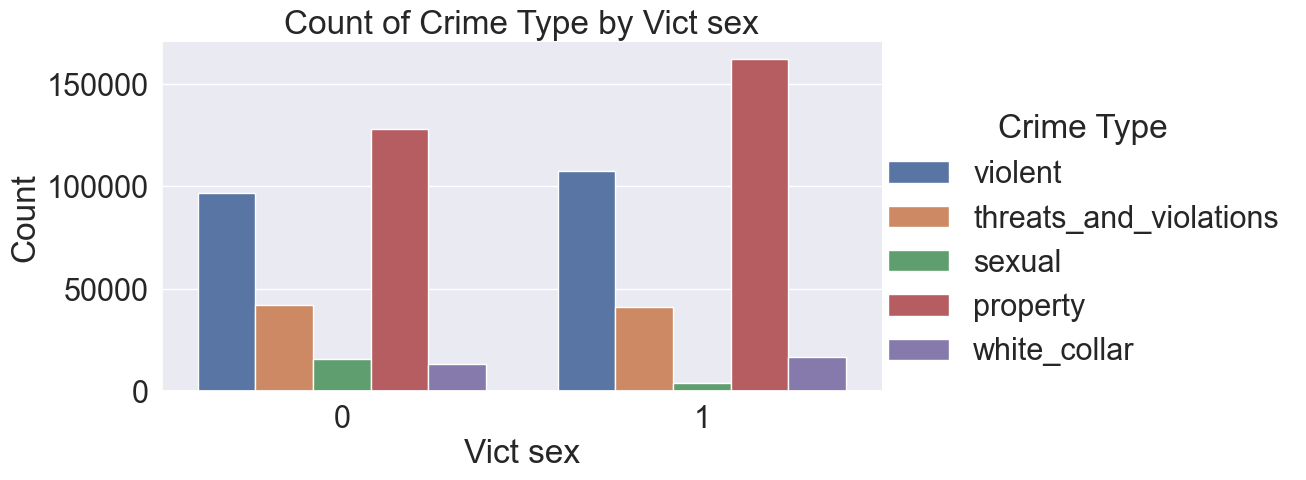

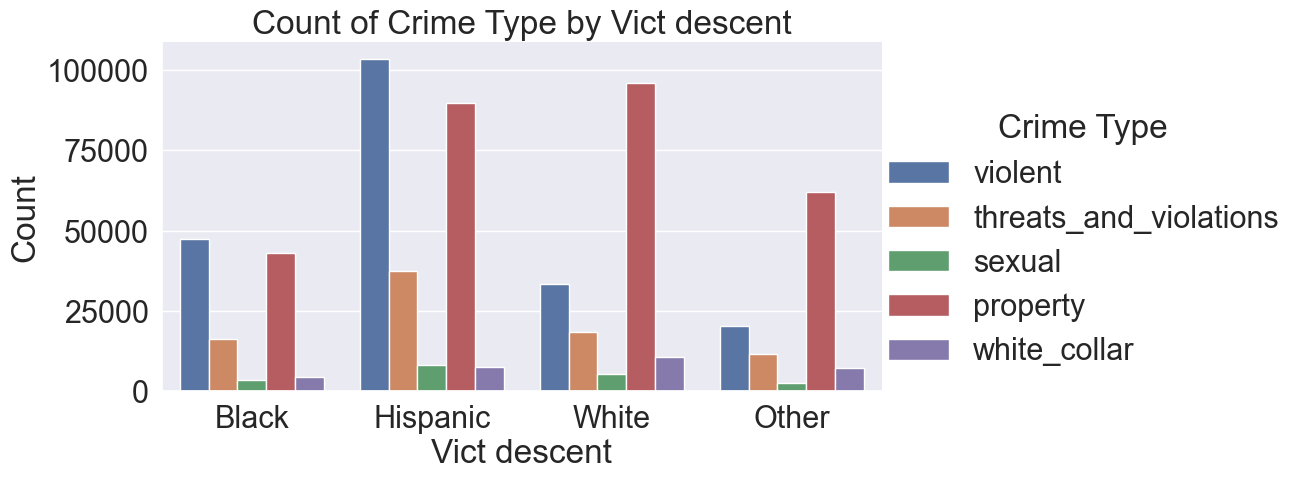

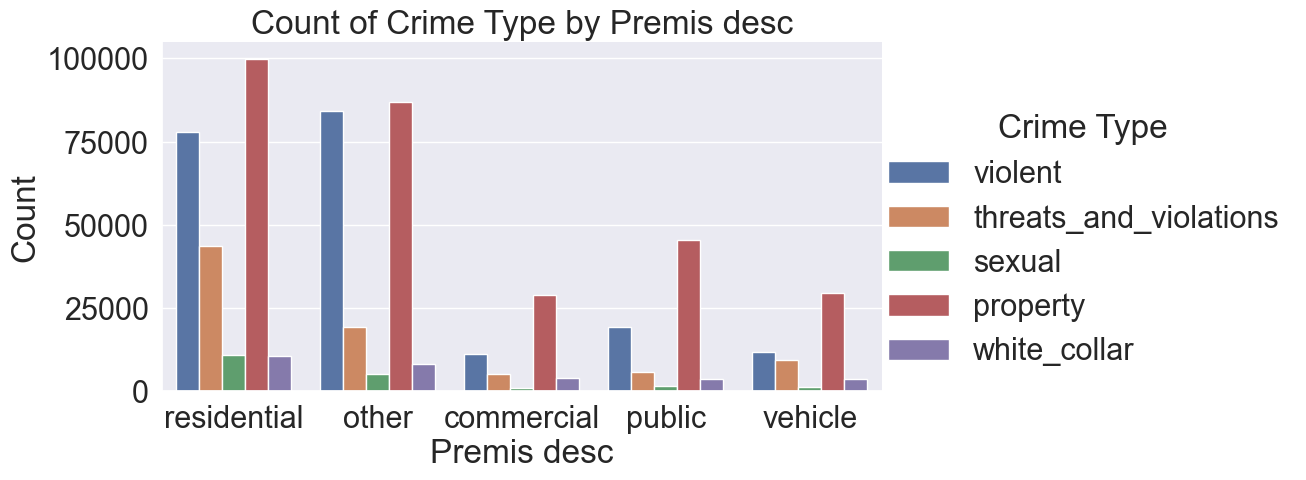

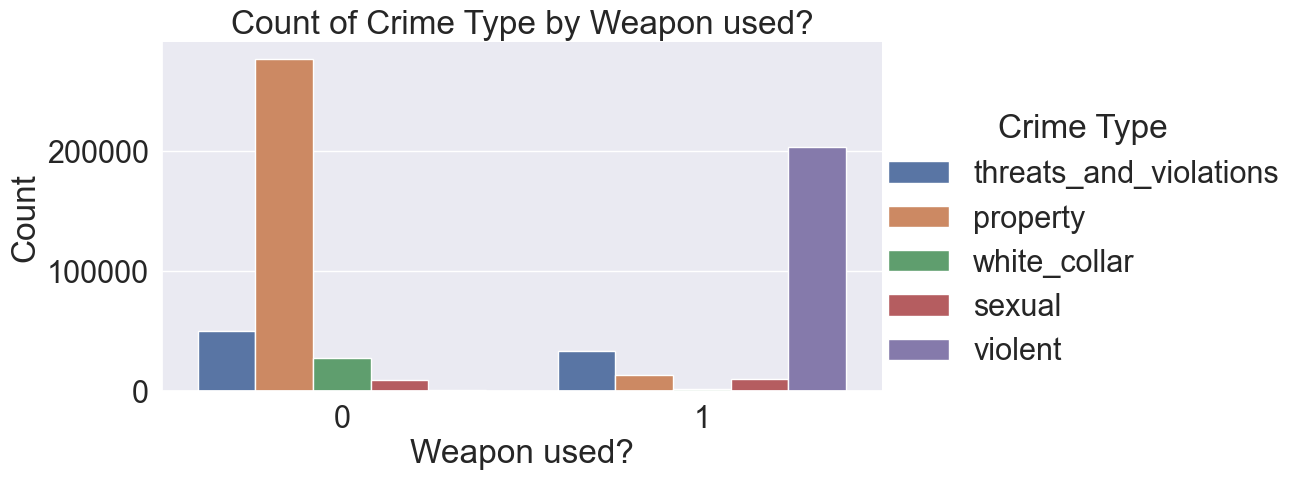

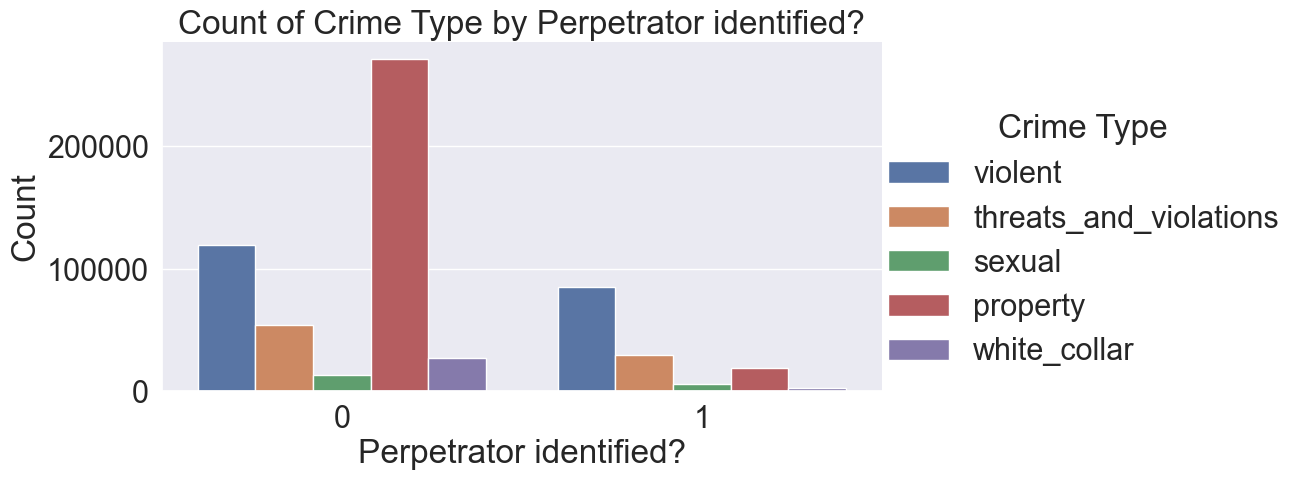

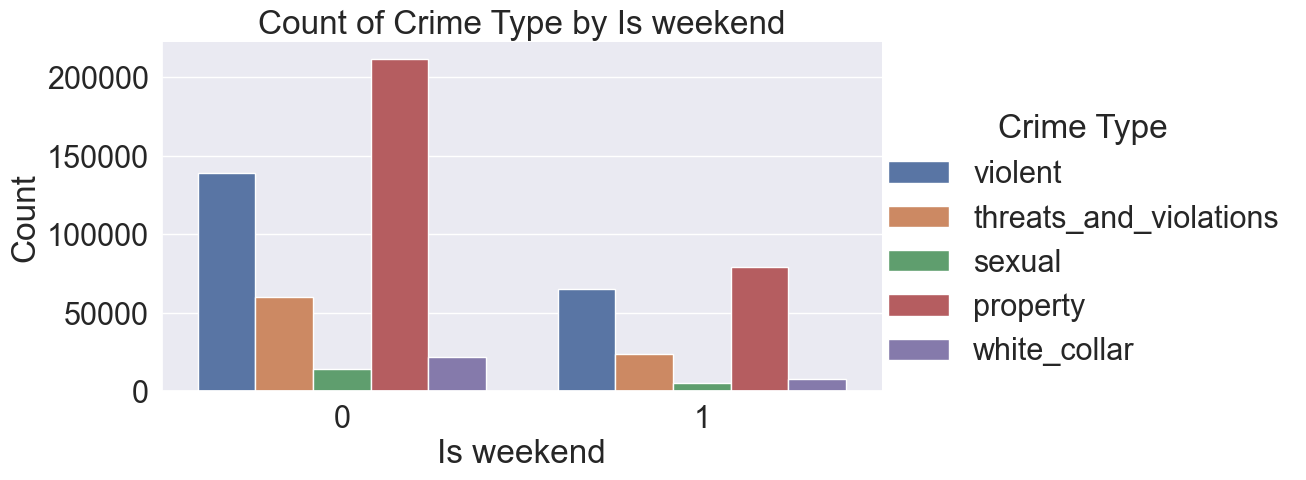

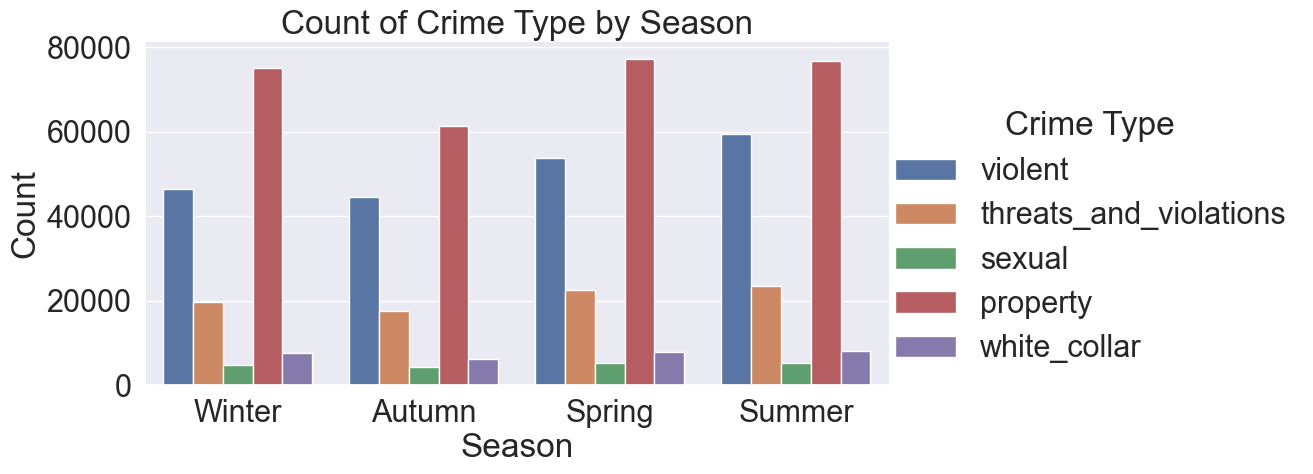

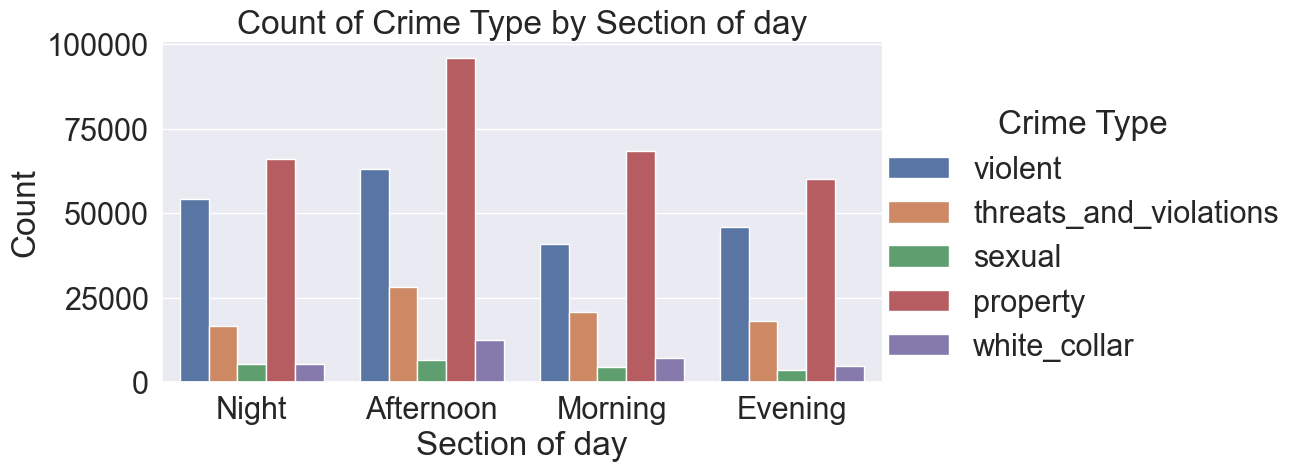

In [296]:
# Iterate over the column names and create a countplot for each column
for column in df.columns:
    if column not in ['Vict Age', 'Crime Type', 'Area Name', 'Days Until Reported']:
        create_countplot(column)

<Axes: ylabel='Frequency'>

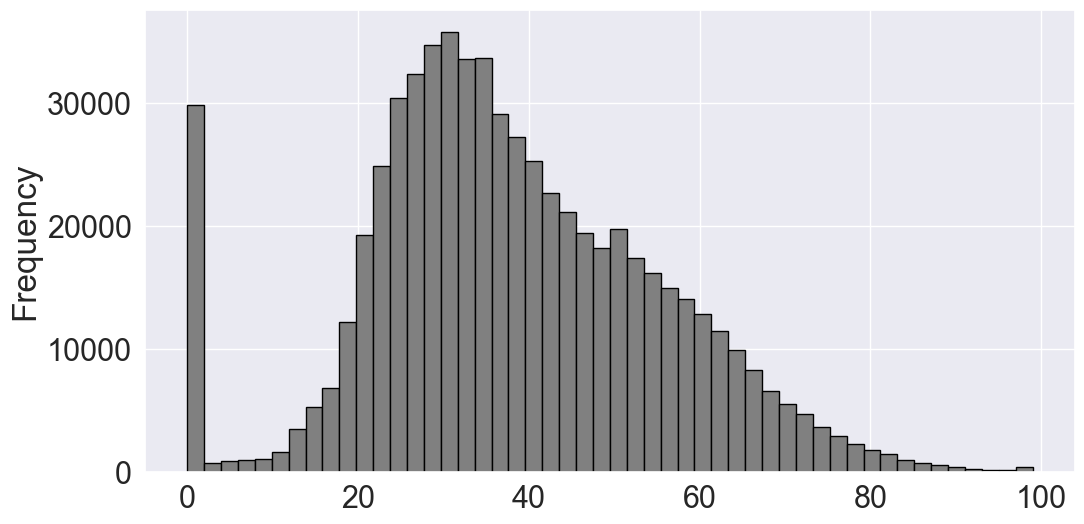

In [297]:
df['Vict Age'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

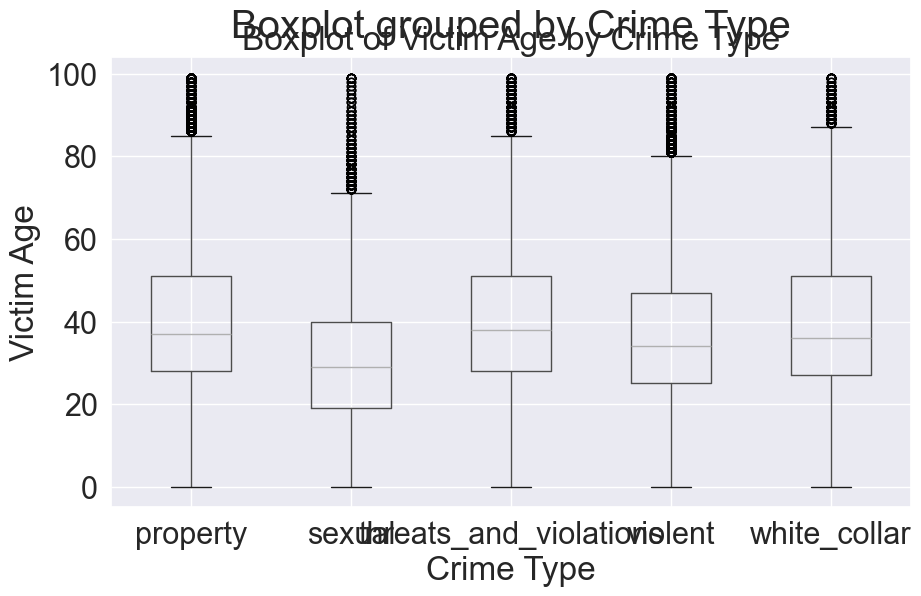

In [298]:
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot('Vict Age', by='Crime Type', ax=ax)
ax.set_xlabel('Crime Type')
ax.set_ylabel('Victim Age')
ax.set_title('Boxplot of Victim Age by Crime Type')
plt.show()

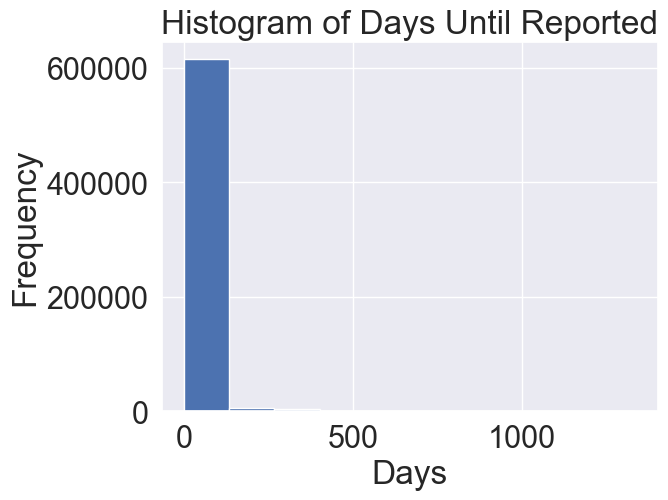

In [299]:
plt.hist(df['Days Until Reported'], bins=10)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Days Until Reported')
plt.show()

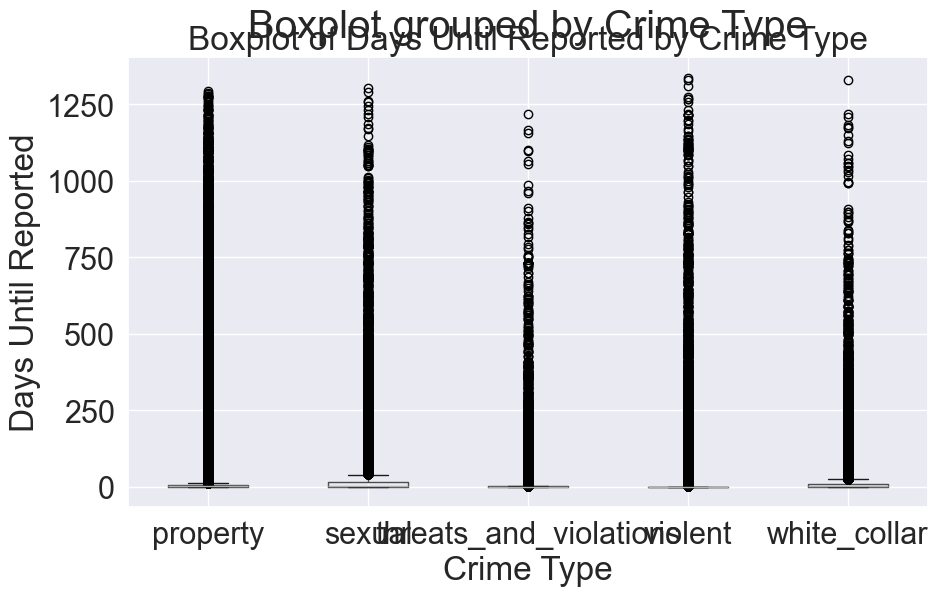

In [300]:
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot('Days Until Reported', by='Crime Type', ax=ax)
ax.set_xlabel('Crime Type')
ax.set_ylabel('Days Until Reported')
ax.set_title('Boxplot of Days Until Reported by Crime Type')
plt.show()

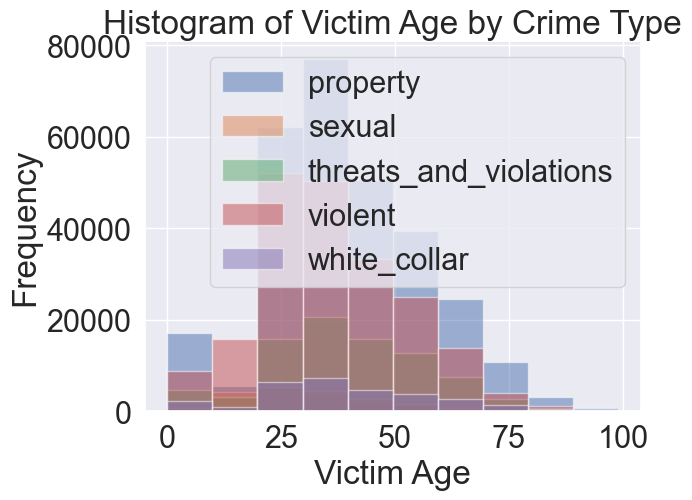

In [301]:
import matplotlib.pyplot as plt

# Create a histogram of the 'age' column for smokers and non-smokers
df[df['Crime Type'] == 'property']['Vict Age'].hist(alpha=0.5, label='property')
df[df['Crime Type'] == 'sexual']['Vict Age'].hist(alpha=0.5, label='sexual')
df[df['Crime Type'] == 'threats_and_violations']['Vict Age'].hist(alpha=0.5, label='threats_and_violations')
df[df['Crime Type'] == 'violent']['Vict Age'].hist(alpha=0.5, label='violent')
df[df['Crime Type'] == 'white_collar']['Vict Age'].hist(alpha=0.5, label='white_collar')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Histogram of Victim Age by Crime Type')
plt.legend()
plt.show()

In [302]:
df['Is Weekend']

0         0
1         0
3         0
5         0
6         0
         ..
802951    0
802952    0
802953    0
802954    1
802955    1
Name: Is Weekend, Length: 627727, dtype: int64

Delete this doesn't tell much

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627727 entries, 0 to 802955
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Area Name                627727 non-null  object
 1   Crime Type               627727 non-null  object
 2   Vict Age                 627727 non-null  int64 
 3   Vict Sex                 627727 non-null  int64 
 4   Vict Descent             627727 non-null  object
 5   Premis Desc              627727 non-null  object
 6   Weapon Used?             627727 non-null  int64 
 7   Perpetrator Identified?  627727 non-null  int64 
 8   Is Weekend               627727 non-null  int64 
 9   Season                   627727 non-null  object
 10  Days Until Reported      627727 non-null  int64 
 11  Section of Day           627727 non-null  object
dtypes: int64(6), object(6)
memory usage: 62.3+ MB


In [304]:
y = df['Crime Type']
dummy_y = pd.get_dummies(y, drop_first=False)
dummy_dfx = pd.get_dummies(df.drop(['Crime Type'], axis=1))
dummy_df = pd.concat([dummy_dfx, y], axis=1)

In [305]:
dummy_df.columns

Index(['Vict Age', 'Vict Sex', 'Weapon Used?', 'Perpetrator Identified?',
       'Is Weekend', 'Days Until Reported', 'Area Name_77th Street',
       'Area Name_Central', 'Area Name_Devonshire', 'Area Name_Foothill',
       'Area Name_Harbor', 'Area Name_Hollenbeck', 'Area Name_Hollywood',
       'Area Name_Mission', 'Area Name_N Hollywood', 'Area Name_Newton',
       'Area Name_Northeast', 'Area Name_Olympic', 'Area Name_Pacific',
       'Area Name_Rampart', 'Area Name_Southeast', 'Area Name_Southwest',
       'Area Name_Topanga', 'Area Name_Van Nuys', 'Area Name_West LA',
       'Area Name_West Valley', 'Area Name_Wilshire', 'Vict Descent_Black',
       'Vict Descent_Hispanic', 'Vict Descent_Other', 'Vict Descent_White',
       'Premis Desc_commercial', 'Premis Desc_other', 'Premis Desc_public',
       'Premis Desc_residential', 'Premis Desc_vehicle', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Section of Day_Afternoon', 'Section of Day_Evening'

In [306]:
dummy_dfx.columns

Index(['Vict Age', 'Vict Sex', 'Weapon Used?', 'Perpetrator Identified?',
       'Is Weekend', 'Days Until Reported', 'Area Name_77th Street',
       'Area Name_Central', 'Area Name_Devonshire', 'Area Name_Foothill',
       'Area Name_Harbor', 'Area Name_Hollenbeck', 'Area Name_Hollywood',
       'Area Name_Mission', 'Area Name_N Hollywood', 'Area Name_Newton',
       'Area Name_Northeast', 'Area Name_Olympic', 'Area Name_Pacific',
       'Area Name_Rampart', 'Area Name_Southeast', 'Area Name_Southwest',
       'Area Name_Topanga', 'Area Name_Van Nuys', 'Area Name_West LA',
       'Area Name_West Valley', 'Area Name_Wilshire', 'Vict Descent_Black',
       'Vict Descent_Hispanic', 'Vict Descent_Other', 'Vict Descent_White',
       'Premis Desc_commercial', 'Premis Desc_other', 'Premis Desc_public',
       'Premis Desc_residential', 'Premis Desc_vehicle', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Section of Day_Afternoon', 'Section of Day_Evening'

In [307]:
dummy_y.columns

Index(['property', 'sexual', 'threats_and_violations', 'violent',
       'white_collar'],
      dtype='object')

In [308]:
dummy_dfx.shape

(627727, 44)

In [309]:
dummy_df.shape

(627727, 45)

In [310]:

# Define a dictionary to store the top 10 positive and negative correlations for each binary variable
corr_dict = {}

# Compute the correlation between each input feature and each binary variable
for col in dummy_y.columns:
    corr_series = dummy_dfx.corrwith(dummy_y[col]).sort_values(ascending=False)
    corr_dict[col] = {'positive': corr_series.head(10), 'negative': corr_series.tail(10)}

# Assign the top 10 positive and negative correlations for each binary variable to separate variables
property_corr = corr_dict['property']
sexual_corr = corr_dict['sexual']
threats_and_violations_corr = corr_dict['threats_and_violations']
violent_corr = corr_dict['violent']
white_collar_corr = corr_dict['white_collar']

In [311]:
property_corr

{'positive': Vict Descent_White        0.147554
 Vict Descent_Other        0.121074
 Premis Desc_public        0.100952
 Premis Desc_commercial    0.067768
 Area Name_West LA         0.063332
 Vict Age                  0.062575
 Days Until Reported       0.060680
 Vict Sex                  0.056764
 Area Name_Pacific         0.055173
 Premis Desc_vehicle       0.043944
 dtype: float64,
 'negative': Is Weekend                -0.035824
 Area Name_Newton          -0.036653
 Premis Desc_other         -0.050543
 Area Name_Southeast       -0.064749
 Area Name_77th Street     -0.074202
 Premis Desc_residential   -0.082198
 Vict Descent_Black        -0.082495
 Vict Descent_Hispanic     -0.159403
 Perpetrator Identified?   -0.359003
 Weapon Used?              -0.700734
 dtype: float64}

In [312]:
sexual_corr

{'positive': Days Until Reported        0.099652
 Premis Desc_residential    0.063772
 Weapon Used?               0.037974
 Perpetrator Identified?    0.036999
 Section of Day_Night       0.015430
 Area Name_Hollywood        0.011100
 Vict Descent_Hispanic      0.008998
 Area Name_West LA          0.005302
 Vict Descent_White         0.004713
 Area Name_Devonshire       0.003481
 dtype: float64,
 'negative': Area Name_Newton         -0.007076
 Area Name_Southeast      -0.008587
 Section of Day_Evening   -0.014559
 Premis Desc_vehicle      -0.018819
 Vict Descent_Other       -0.018928
 Premis Desc_commercial   -0.023182
 Premis Desc_public       -0.024333
 Premis Desc_other        -0.024608
 Vict Age                 -0.070957
 Vict Sex                 -0.117571
 dtype: float64}

High correlation for victim's sex to be female. This makes sense (unfortunately) as most sexual crimes do occur to females. Likely to be a residential area (lots of these happen in houses). Status description likley to be Juvenile or Adult, meaning the perpetrator tends to be identified. And area name being Hollywood is popular which is an interesting finding. Famous people living in Hollywood committing sexual crimes could be a cause for this. 

Low correlation for the victim being male (makes sense due to above), and age has a negative correlation too meaning younger people are more likely to be victims.

In [313]:
threats_and_violations_corr

{'positive': Perpetrator Identified?    0.120809
 Premis Desc_residential    0.109399
 Vict Descent_Hispanic      0.044289
 Premis Desc_vehicle        0.035441
 Vict Age                   0.033666
 Area Name_Harbor           0.025200
 Section of Day_Morning     0.021435
 Area Name_Southeast        0.015944
 Area Name_Hollenbeck       0.014730
 Area Name_Foothill         0.013904
 dtype: float64,
 'negative': Premis Desc_commercial   -0.027619
 Area Name_Pacific        -0.027803
 Vict Sex                 -0.027879
 Vict Descent_Other       -0.028655
 Area Name_Central        -0.031888
 Section of Day_Night     -0.033907
 Vict Descent_White       -0.035086
 Days Until Reported      -0.044627
 Premis Desc_public       -0.060949
 Premis Desc_other        -0.076937
 dtype: float64}

High correlation for adult to be identified as perpetrator of crime. Good correlation for description to be residential. Victim descent being Hispanic, and victim age being high positive correlations too

Low correlation for investigation of the perpetrator to be continuing, low correlation for place of crime to be in public (makes sense as these things are usually towars property etc)

In [314]:
violent_corr

{'positive': Weapon Used?               0.812452
 Perpetrator Identified?    0.314604
 Vict Descent_Hispanic      0.162818
 Premis Desc_other          0.129985
 Vict Descent_Black         0.089005
 Area Name_77th Street      0.079405
 Area Name_Southeast        0.070946
 Section of Day_Night       0.050077
 Is Weekend                 0.047840
 Area Name_Newton           0.046655
 dtype: float64,
 'negative': Section of Day_Morning   -0.041895
 Area Name_Pacific        -0.052122
 Premis Desc_public       -0.054795
 Premis Desc_commercial   -0.062935
 Vict Age                 -0.069124
 Area Name_West LA        -0.069208
 Premis Desc_vehicle      -0.076739
 Days Until Reported      -0.084965
 Vict Descent_Other       -0.123351
 Vict Descent_White       -0.155153
 dtype: float64}

High correlation for the perpetrator to be an adult and identified. Also good corleations for victim to be black or hispanic. 77th Street decent correlation as dangerous area potentially and Southeast too.

Investigation continuing has a negative correlation, meaning that the perpetrator is usually found for violent crimes (good thing). Negative correlation for victim age too, meaning that younger people more likely to be victims of violent crimes 

Adults tend to be identified for these violent crimes. 

In [315]:
white_collar_corr

{'positive': Vict Descent_Other          0.049046
 Vict Descent_White          0.047945
 Premis Desc_commercial      0.042770
 Section of Day_Afternoon    0.041028
 Days Until Reported         0.034566
 Area Name_Pacific           0.031334
 Premis Desc_vehicle         0.024792
 Area Name_West LA           0.020768
 Area Name_Central           0.017632
 Area Name_Hollywood         0.017565
 dtype: float64,
 'negative': Area Name_Hollenbeck      -0.015442
 Vict Descent_Black        -0.022028
 Area Name_77th Street     -0.022747
 Area Name_Southeast       -0.022881
 Premis Desc_other         -0.024814
 Section of Day_Evening    -0.026396
 Section of Day_Night      -0.029250
 Vict Descent_Hispanic     -0.062945
 Perpetrator Identified?   -0.074441
 Weapon Used?              -0.158025
 dtype: float64}

Low correlations overall, positive or negative. White collar crimes have positive correlation with investigation continuing, showing perpetrator usually not found.

Negative correlation with victim being Hispanic and are being Southeast

In [319]:
correlation_matrix = dummy_dfx.corr()  # get the correlation matrix of the DataFrame

# Flatten the correlation matrix and sort the values in descending order
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)

# Exclude self-correlations and correlations with the same feature
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 10 highest correlations
top_10_highest_correlations = correlation_values.head(10)

# Get the top 10 lowest correlations
top_10_lowest_correlations = correlation_values.tail(10)

print("Top 10 Highest Correlations:")
print(top_10_highest_correlations)

print("\nTop 10 Lowest Correlations:")
print(top_10_lowest_correlations)

Top 10 Highest Correlations:
Perpetrator Identified?  Weapon Used?               0.354781
Area Name_77th Street    Vict Descent_Black         0.211740
Vict Descent_Hispanic    Weapon Used?               0.170274
Perpetrator Identified?  Premis Desc_residential    0.165803
Area Name_Southeast      Vict Descent_Black         0.161185
Area Name_Southwest      Vict Descent_Black         0.143310
Area Name_Hollenbeck     Vict Descent_Hispanic      0.130213
Area Name_West LA        Vict Descent_White         0.130193
Area Name_Pacific        Vict Descent_White         0.120619
Premis Desc_other        Weapon Used?               0.118640
dtype: float64

Top 10 Lowest Correlations:
Season_Spring             Season_Winter             -0.342478
Season_Summer             Season_Winter             -0.351500
Vict Descent_Hispanic     Vict Descent_Other        -0.356606
Section of Day_Afternoon  Section of Day_Evening    -0.361254
Season_Spring             Season_Summer             -0.371491
Section

In [317]:
print("\nTop 20 Lowest Correlations:")
print(top_20_lowest_correlations)


Top 20 Lowest Correlations:
Premis Desc_other         Premis Desc_public        -0.256633
Vict Descent_Other        Vict Descent_White        -0.263657
Section of Day_Evening    Section of Day_Morning    -0.279068
Vict Descent_Black        Vict Descent_White        -0.280506
Section of Day_Evening    Section of Day_Night      -0.286967
Premis Desc_public        Premis Desc_residential   -0.294308
Season_Autumn             Season_Winter             -0.296558
Section of Day_Morning    Section of Day_Night      -0.299510
Season_Autumn             Season_Spring             -0.313424
                          Season_Summer             -0.321681
Season_Spring             Season_Winter             -0.342478
Season_Summer             Season_Winter             -0.351500
Vict Descent_Hispanic     Vict Descent_Other        -0.356606
Section of Day_Afternoon  Section of Day_Evening    -0.361254
Season_Spring             Season_Summer             -0.371491
Section of Day_Afternoon  Section of Day_

In [318]:
top_40_lowest_correlations = correlation_values.tail(40)
print("\nTop 40 Lowest Correlations:")
print(top_40_lowest_correlations)


Top 40 Lowest Correlations:
Area Name_Southwest       Vict Descent_White        -0.082006
Vict Descent_Black        Vict Sex                  -0.083836
Area Name_77th Street     Vict Descent_Other        -0.087290
Premis Desc_commercial    Vict Age                  -0.087501
                          Premis Desc_vehicle       -0.091567
Area Name_Pacific         Vict Descent_Hispanic     -0.099884
Area Name_Central         Premis Desc_residential   -0.101878
Premis Desc_commercial    Premis Desc_public        -0.108930
Premis Desc_public        Premis Desc_vehicle       -0.115319
Area Name_West LA         Vict Descent_Hispanic     -0.116909
Area Name_Southeast       Vict Descent_White        -0.121268
Area Name_77th Street     Vict Descent_White        -0.133007
Vict Descent_Other        Weapon Used?              -0.134463
Vict Descent_White        Weapon Used?              -0.166243
Premis Desc_residential   Vict Sex                  -0.173802
Premis Desc_commercial    Premis Desc_oth

In [200]:
X = dummy_df.drop(['Crime Type'], axis=1)
y = dummy_df['Crime Type']

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# START RANDOM FOREST

In [320]:

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [321]:
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7322


In [322]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

# Define the parameter grid
params = {
    'n_estimators': range(100, 300, 50),
    'max_depth': [8, 10, 12],
    'max_features': [None],
    'criterion': ['gini']
}

# Create a random forest classifier object
clf = RandomForestClassifier(n_jobs=None, random_state=27, verbose=1)

# Create a GridSearchCV object
gsearch1 = GridSearchCV(estimator=clf, param_grid=params, scoring='f1_micro', n_jobs=-1, verbose=10, cv=3)

# Fit the GridSearchCV object to the training data
gsearch1.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', gsearch1.best_params_)
print('Best Score:', gsearch1.best_score_)

# Set the best parameters to the RandomForestClassifier object
clf.set_params(**gsearch1.best_params_)

# Fit the model with the best parameters to the training data
clf.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 2/3; 2/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=150
[CV 1/3; 1/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=100
[CV 3/3; 2/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=150
[CV 2/3; 3/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=200[CV 1/3; 3/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=200

[CV 3/3; 1/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=100
[CV 2/3; 1/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=100
[CV 1/3; 2/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


[CV 2/3; 1/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=100;, score=0.778 total time= 2.8min
[CV 3/3; 3/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=200
[CV 3/3; 1/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=100;, score=0.777 total time= 2.8min
[CV 1/3; 4/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=250
[CV 1/3; 1/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=100;, score=0.777 total time= 2.8min
[CV 2/3; 4/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


[CV 2/3; 2/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=150;, score=0.778 total time= 4.0min
[CV 3/3; 4/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=250
[CV 1/3; 2/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=150;, score=0.777 total time= 4.0min
[CV 1/3; 5/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=100
[CV 3/3; 2/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=150;, score=0.777 total time= 4.0min
[CV 2/3; 5/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min


[CV 1/3; 3/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=200;, score=0.777 total time= 5.3min
[CV 3/3; 5/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.3s


[CV 2/3; 3/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=200;, score=0.778 total time= 5.3min
[CV 1/3; 6/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 1/3; 5/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=100;, score=0.778 total time= 3.5min
[CV 2/3; 6/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=150
[CV 2/3; 5/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=100;, score=0.779 total time= 3.5min
[CV 3/3; 6/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.3min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.3min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s


[CV 3/3; 3/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=200;, score=0.778 total time= 5.5min
[CV 1/3; 7/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s


[CV 3/3; 5/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=100;, score=0.778 total time= 3.6min
[CV 2/3; 7/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s


[CV 1/3; 4/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=250;, score=0.777 total time= 6.9min
[CV 3/3; 7/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=200
[CV 2/3; 4/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=250;, score=0.778 total time= 6.9min
[CV 1/3; 8/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s


[CV 1/3; 6/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=150;, score=0.778 total time= 5.4min
[CV 2/3; 8/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.8s


[CV 3/3; 4/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=250;, score=0.778 total time= 7.3min
[CV 3/3; 8/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min


[CV 2/3; 6/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=150;, score=0.779 total time= 5.5min
[CV 1/3; 9/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=100
[CV 3/3; 6/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=150;, score=0.778 total time= 5.5min
[CV 2/3; 9/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  7.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.2s


[CV 1/3; 7/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=200;, score=0.778 total time= 7.3min
[CV 3/3; 9/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  7.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.8s


[CV 2/3; 7/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=200;, score=0.779 total time= 7.1min
[CV 1/3; 10/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.9min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  7.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s


[CV 3/3; 7/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=200;, score=0.778 total time= 7.1min
[CV 2/3; 10/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s


[CV 2/3; 9/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=100;, score=0.779 total time= 4.1min
[CV 3/3; 10/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=150
[CV 1/3; 9/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=100;, score=0.778 total time= 4.1min
[CV 1/3; 11/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s


[CV 1/3; 8/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=250;, score=0.778 total time= 8.8min
[CV 2/3; 11/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s


[CV 2/3; 8/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=250;, score=0.779 total time= 8.6min
[CV 3/3; 11/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=200
[CV 3/3; 9/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=100;, score=0.778 total time= 3.8min
[CV 1/3; 12/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s


[CV 3/3; 8/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=250;, score=0.778 total time= 8.6min
[CV 2/3; 12/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min


[CV 1/3; 10/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=150;, score=0.778 total time= 5.5min
[CV 3/3; 12/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 2/3; 10/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=150;, score=0.779 total time= 5.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s


[CV 3/3; 10/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=150;, score=0.779 total time= 5.4min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.8s


[CV 1/3; 11/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=200;, score=0.778 total time= 6.6min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  8.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s


[CV 2/3; 11/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=200;, score=0.779 total time=16.2min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 15.8min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 15.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.6s


[CV 3/3; 11/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=200;, score=0.779 total time=15.9min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 15.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.2s


[CV 1/3; 12/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=250;, score=0.779 total time=16.9min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 14.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.8s


[CV 2/3; 12/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=250;, score=0.779 total time=16.6min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.3s


[CV 3/3; 12/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=250;, score=0.779 total time=15.5min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   59.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  4.0min


Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'n_estimators': 250}
Best Score: 0.7786953307861295


In [323]:
# Set the best parameters to the RandomForestClassifier object
clf.set_params(**gsearch1.best_params_)

# Fit the model with the best parameters to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  4.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s


Accuracy: 0.7782565752791806


In [329]:
# Generate the predicted labels for the test data
clf_predict = clf.predict(X_test)

# Print the confusion matrix and classification report
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, clf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, clf_predict))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.0s


=== Confusion Matrix ===
[[54236   115  1357  2360    28]
 [ 1414   449   260  1790    13]
 [ 7456    83  2546  6612     4]
 [  215   159    50 40419     0]
 [ 5350    30   139   404    57]]


=== Classification Report ===
                        precision    recall  f1-score   support

              property       0.79      0.93      0.86     58096
                sexual       0.54      0.11      0.19      3926
threats_and_violations       0.59      0.15      0.24     16701
               violent       0.78      0.99      0.87     40843
          white_collar       0.56      0.01      0.02      5980

              accuracy                           0.78    125546
             macro avg       0.65      0.44      0.44    125546
          weighted avg       0.74      0.78      0.72    125546



In [ ]:
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components='mle')
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

# Fit an SVM classifier to the training data
svc = svm.SVC(kernel='rbf', C=1.2, gamma=0.3).fit(x_train_pca, y_train)

# Evaluate the classifier on the test data
accuracy = svc.score(x_test_pca, y_test.to_numpy())
print('SVM Accuracy:', accuracy)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 10),
    'colsample_bytree': uniform(0.1, 0.9),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

model = xgb.XGBRegressor(random_state=1)

# run the search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    random_state=42,
    verbose=1,
    scoring="neg_root_mean_squared_error"
)
random_search.fit(X_train, y_train)

"""
Fitting 5 folds for each of 100 candidates, totalling 500 fits
"""

In [ ]:
print("Best estimator: ", random_search.best_estimator_)

"""
Best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.36664615513367416, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.1652669390630025, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.017818203370596968, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=443, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=1, reg_alpha=0.3948815181755697,
             reg_lambda=0.2934881747180381, ...)
"""

In [ ]:
print("Best score: ", random_search.best_score_)
print("Best hyperparameters: ", random_search.best_params_)

"""
Best score:  -21681.389784324936
Best hyperparameters:  {'colsample_bytree': 0.36664615513367416, 'gamma': 0.1652669390630025, 'learning_rate': 0.017818203370596968, 'max_depth': 9, 'n_estimators': 443, 'reg_alpha': 0.3948815181755697, 'reg_lambda': 0.2934881747180381}
"""

In [ ]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.head()

In [ ]:
print("Best index: ", random_search.best_index_)
print("Best scorer: ", random_search.scorer_)
print("Best n splits: ", random_search.n_splits_)
print("Best refit time: ", random_search.refit_time_)
print("Best multi metric: ", random_search.multimetric_)
print("Best n features: ", random_search.n_features_in_)

"""
Best index:  10
Best scorer:  make_scorer(mean_squared_error, greater_is_better=False, squared=False)
Best n splits:  5
Best refit time:  0.45199108123779297
Best multi metric:  False
Best n features:  51
"""

In [ ]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")

"""
Train RMSE: 3604.8162519843863, Test RMSE: 17321.86440339491
"""

In [ ]:
# END RANDOM FOREST

In [ ]:
# START VOTING CLASSIFIER

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

### standardize the dataframe (training and test data should be separated)
### we only standardize the numerical columns


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


#### few classifiers we choose for example SVM, Logistic and AdaBoost

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
svc_classifier = SVC()
logreg_classifier = LogisticRegression()
adaboost_classifier = AdaBoostClassifier()

# Train the models on the training data
svc_classifier.fit(X_train, y_train)
logreg_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)

# Step 3: Evaluate the models
# Make predictions on the test data
svc_predictions = svc_classifier.predict(X_test)
logreg_predictions = logreg_classifier.predict(X_test)
adaboost_predictions = adaboost_classifier.predict(X_test)

# Evaluate the performance of each classifier using various metrics

svc_precision = precision_score(y_test, svc_predictions, average='weighted')
logreg_precision = precision_score(y_test, logreg_predictions, average='weighted')
adaboost_precision = precision_score(y_test, adaboost_predictions, average='weighted')

svc_recall = recall_score(y_test, svc_predictions, average='weighted')
logreg_recall = recall_score(y_test, logreg_predictions, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_predictions, average='weighted')

svc_f1 = f1_score(y_test, svc_predictions, average='weighted')
logreg_f1 = f1_score(y_test, logreg_predictions, average='weighted')
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted')

# Print the evaluation metrics
print("SVC, LogReg, AdaBoost Precisions:", svc_precision, logreg_precision, adaboost_precision)
print("SVC, LogReg, AdaBoost Recalls:", svc_recall, logreg_recall, adaboost_recall)
print("SVC, LogReg, AdaBoost F1-scores:", svc_f1, logreg_f1, adaboost_f1)


In [ ]:
# END VOTING CLASSIFIER

In [ ]:
# START RANDOM FOREST AGAIN

In [ ]:

from sklearn.model_selection import train_test_split# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y test_size=0.33, random_state=66)


In [ ]:

from sklearn import model_selection# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)


In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')



In [ ]:

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split# implementing train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y test_size=0.33, random_state=66)

clf = RandomForestClassifier(n_jobs=None, random_state=27, verbose=1, max_features=None)
clf.fit(X_train, y_train)



In [ ]:

predicted_labels = clf.predict(X_test)


In [ ]:

# Calculate the accuracy of the model on the training data
accuracy = accuracy_score(y_test, predicted_labels)

# Print the accuracy score
print('Accuracy:', accuracy)



In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

# Define the parameter grid
params = {
    'n_estimators': range(100, 300, 50),
    'max_depth': [8, 10, 12],
    'max_features': [None],
    'criterion': ['gini']
}

# Create a random forest classifier object
clf = RandomForestClassifier(n_jobs=None, random_state=27, verbose=1)

# Create a GridSearchCV object
gsearch1 = GridSearchCV(estimator=clf, param_grid=params, scoring='f1_micro', n_jobs=-1, verbose=10, cv=3)

# Fit the GridSearchCV object to the training data
gsearch1.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', gsearch1.best_params_)
print('Best Score:', gsearch1.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=100
[CV 1/3; 2/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=150
[CV 2/3; 1/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=100
[CV 3/3; 1/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=100
[CV 2/3; 2/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=150
[CV 3/3; 2/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=150
[CV 1/3; 3/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=200
[CV 2/3; 3/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


[CV 2/3; 1/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=100;, score=0.778 total time= 2.6min
[CV 3/3; 3/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=200
[CV 1/3; 1/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=100;, score=0.777 total time= 2.6min
[CV 1/3; 4/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s


[CV 3/3; 1/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=100;, score=0.777 total time= 2.6min
[CV 2/3; 4/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


[CV 1/3; 2/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=150;, score=0.777 total time= 3.9min
[CV 3/3; 4/12] START criterion=gini, max_depth=8, max_features=None, n_estimators=250
[CV 3/3; 2/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=150;, score=0.777 total time= 4.0min
[CV 1/3; 5/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=100
[CV 2/3; 2/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=150;, score=0.778 total time= 4.0min
[CV 2/3; 5/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.0min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.7s


[CV 2/3; 3/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=200;, score=0.778 total time= 5.1min
[CV 3/3; 5/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.2s


[CV 1/3; 3/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=200;, score=0.777 total time= 5.2min
[CV 1/3; 6/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 2/3; 5/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=100;, score=0.779 total time= 3.1min
[CV 2/3; 6/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=150
[CV 1/3; 5/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=100;, score=0.778 total time= 3.2min
[CV 3/3; 6/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.0min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.0s


[CV 3/3; 3/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=200;, score=0.778 total time= 5.2min
[CV 1/3; 7/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 3/3; 5/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=100;, score=0.778 total time= 3.2min
[CV 2/3; 7/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s


[CV 1/3; 4/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=250;, score=0.777 total time= 6.5min
[CV 3/3; 7/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=200
[CV 2/3; 4/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=250;, score=0.778 total time= 6.5min
[CV 1/3; 8/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 1/3; 6/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=150;, score=0.778 total time= 4.8min
[CV 2/3; 8/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.2s


[CV 3/3; 4/12] END criterion=gini, max_depth=8, max_features=None, n_estimators=250;, score=0.778 total time= 6.5min
[CV 3/3; 8/12] START criterion=gini, max_depth=10, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s


[CV 2/3; 6/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=150;, score=0.779 total time= 4.7min
[CV 1/3; 9/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=100
[CV 3/3; 6/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=150;, score=0.778 total time= 4.6min
[CV 2/3; 9/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.9s


[CV 1/3; 7/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=200;, score=0.778 total time= 6.2min
[CV 3/3; 9/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=100


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.9s


[CV 2/3; 7/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=200;, score=0.779 total time= 6.1min
[CV 1/3; 10/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.8min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.9s


[CV 3/3; 7/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=200;, score=0.778 total time= 6.0min
[CV 2/3; 10/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=150


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 1/3; 9/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=100;, score=0.778 total time= 3.4min
[CV 3/3; 10/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=150
[CV 2/3; 9/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=100;, score=0.779 total time= 3.4min
[CV 1/3; 11/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.9s


[CV 1/3; 8/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=250;, score=0.778 total time= 7.4min
[CV 2/3; 11/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 3/3; 9/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=100;, score=0.778 total time= 3.3min
[CV 3/3; 11/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=200


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s


[CV 2/3; 8/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=250;, score=0.779 total time= 7.3min
[CV 1/3; 12/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.2s


[CV 3/3; 8/12] END criterion=gini, max_depth=10, max_features=None, n_estimators=250;, score=0.778 total time= 7.3min
[CV 2/3; 12/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s


[CV 1/3; 10/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=150;, score=0.778 total time= 5.0min
[CV 3/3; 12/12] START criterion=gini, max_depth=12, max_features=None, n_estimators=250


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


[CV 2/3; 10/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=150;, score=0.779 total time= 5.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s


[CV 3/3; 10/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=150;, score=0.779 total time= 5.1min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.7s


[CV 1/3; 11/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=200;, score=0.778 total time= 6.4min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.2s


[CV 2/3; 11/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=200;, score=0.779 total time= 6.0min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.6s


[CV 3/3; 11/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=200;, score=0.779 total time= 5.7min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.1s


[CV 1/3; 12/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=250;, score=0.779 total time= 6.4min


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.7s


[CV 2/3; 12/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=250;, score=0.779 total time= 6.2min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s


[CV 3/3; 12/12] END criterion=gini, max_depth=12, max_features=None, n_estimators=250;, score=0.779 total time= 5.0min


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   49.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  3.4min


Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'n_estimators': 250}
Best Score: 0.7786953307861295


In [ ]:

import xgboost as xgb
import matplotlib.pyplot as plt

def fitXgb(training_data):
    # Create an XGBoost classifier object
    xgb_model = xgb.XGBClassifier(n_jobs=-1, random_state=27)

    # Fit the classifier to the training data
    xgb_model.fit(training_data['X_train'], training_data['Y_train'])

    # Evaluate the classifier on the test data
    y_pred = xgb_model.predict(training_data['X_test'])
    accuracy = accuracy_score(training_data['Y_test'], y_pred)
    f1_micro = f1_score(training_data['Y_test'], y_pred, average='micro')

    # Print the accuracy and F1 score
    print('XGBoost Accuracy:', accuracy)
    print('XGBoost F1-Score (Micro):', f1_micro)

    # Plot the feature importances
    features = ['feature1', 'feature2', 'feature3', ...]
    importances = xgb_model.feature_importances_
    plt.bar(features, importances)
    plt.xticks(rotation=90)
    plt.title('Feature Importances')
    plt.show()

 

In [ ]:

from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)


In [ ]:

fitXgb(xgb1, training_data)
